# What drives the price of a car?

![](https://github.com/Ashish4132/priceofacar/blob/main/images/kurt.jpeg?raw=1)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

<<<<<< More content to be added >>>>>>>


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

**Imports**

Pre Data Step to include the imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV
)
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    OrdinalEncoder,
    PolynomialFeatures
)
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.inspection import permutation_importance


In [2]:
df = pd.read_csv("data/vehicles.csv")
print(f"Vehicles DataFrame shape: {df.shape}")
pd.set_option("display.max_columns", None)
df.head()

Vehicles DataFrame shape: (426880, 18)


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


The dataset for this modeling was provided. Vehicles.csv file includes 426k records. Vehicles dataset includes 18 attributes/features with 426880 records.

In [3]:
df.shape

(426880, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [5]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [6]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [7]:
df.isnull().sum()

,0
id,0
region,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400


In [7]:
missing_percentage = df.isnull().sum() / len(df) * 100
print("Percentage of missing values per column:\n")
print(missing_percentage.to_markdown(numalign="left", stralign="left"))

# Display descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:\n")
print(df[['price', 'year', 'odometer']].describe().to_markdown(numalign="left", stralign="left"))

Percentage of missing values per column:

|              | 0        |
|:-------------|:---------|
| id           | 0        |
| region       | 0        |
| price        | 0        |
| year         | 0.282281 |
| manufacturer | 4.13371  |
| model        | 1.23618  |
| condition    | 40.7852  |
| cylinders    | 41.6225  |
| fuel         | 0.705819 |
| odometer     | 1.03073  |
| title_status | 1.93075  |
| transmission | 0.598763 |
| VIN          | 37.7254  |
| drive        | 30.5863  |
| size         | 71.7675  |
| type         | 21.7527  |
| paint_color  | 30.5011  |
| state        | 0        |

Descriptive statistics for numerical columns:

|       | price       | year    | odometer   |
|:------|:------------|:--------|:-----------|
| count | 426880      | 425675  | 422480     |
| mean  | 75199       | 2011.24 | 98043.3    |
| std   | 1.21823e+07 | 9.45212 | 213882     |
| min   | 0           | 1900    | 0          |
| 25%   | 5900        | 2008    | 37704      |
| 50%   | 13950      

In [8]:
# Feature Engineering: Calculate 'age' of the car
# Assuming current year is 2025 for calculating age
df['age'] = 2025 - df['year']

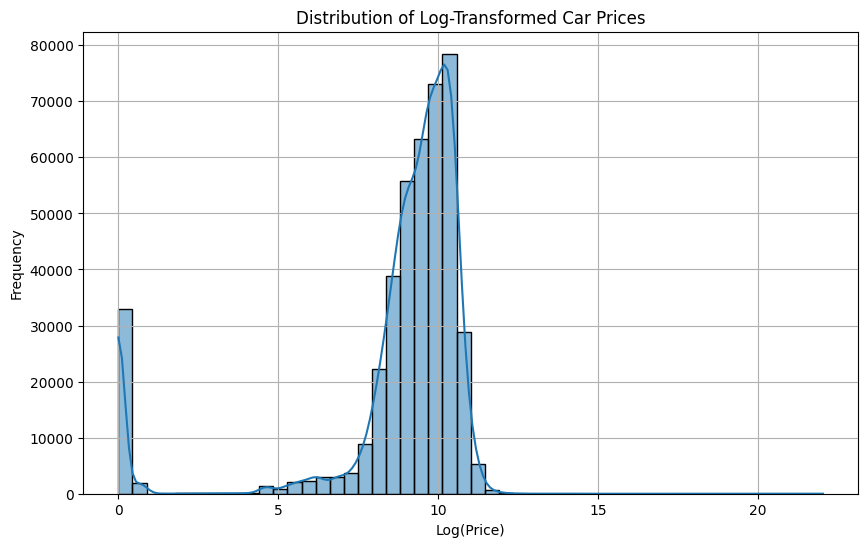

In [14]:
# Apply log transformation to the 'price' column
# Using np.log1p which calculates log(1+x) to handle potential zero values gracefully,
# though we've already filtered out price = 0.
df['log_price'] = np.log1p(df['price'])

# Now, visualize the distribution of the transformed 'log_price'
plt.figure(figsize=(10, 6))
sns.histplot(df['log_price'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Car Prices')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



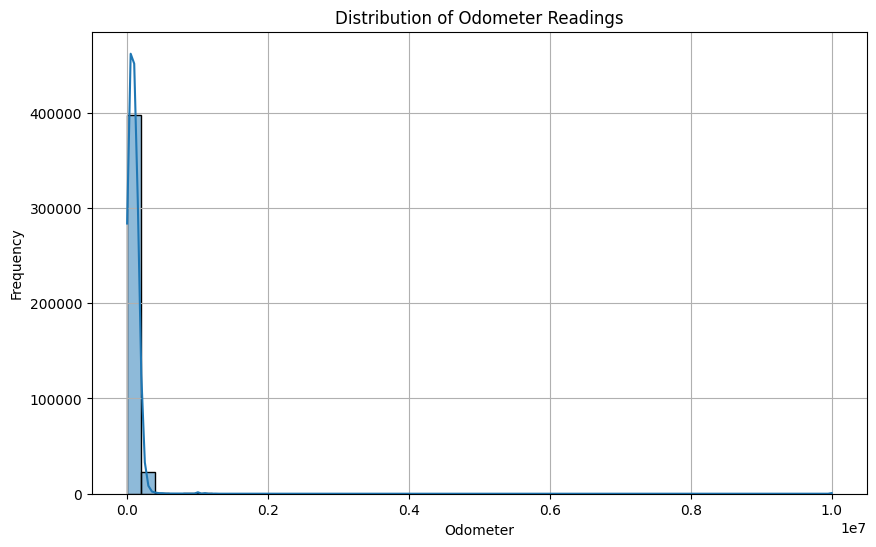

In [11]:

# Distribution of Odometer
plt.figure(figsize=(10, 6))
sns.histplot(df['odometer'], bins=50, kde=True)
plt.title('Distribution of Odometer Readings')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


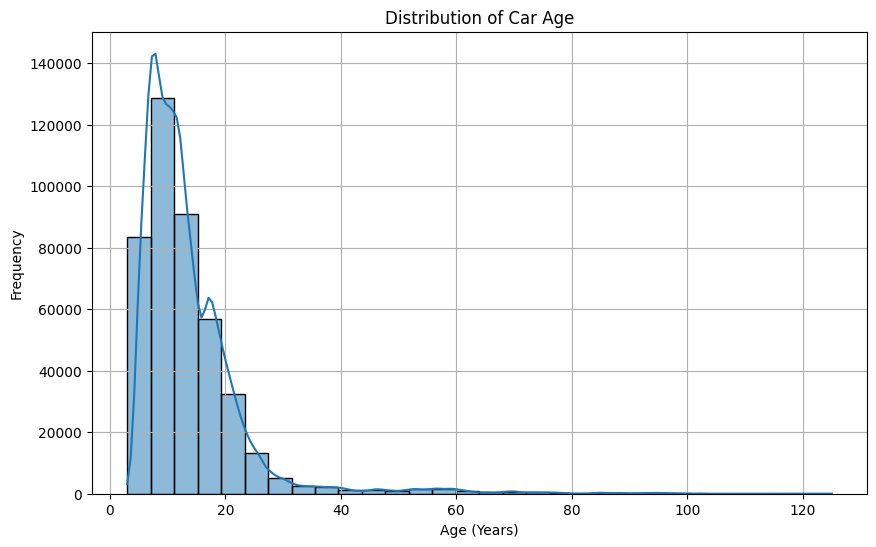

In [12]:

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Car Age')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The target variable contains zero values, which should be removed from the dataset.

In [16]:
df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,age,log_price
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,8.699681
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,9.384378
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,9.952325
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,7.313887
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,8.497195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy,6.0,10.068621
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy,5.0,10.328461
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy,5.0,10.462846
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy,7.0,10.274741


In [18]:
# we define categorical and numerical features.
cat_feature = df.select_dtypes(include=['object', 'category']).columns
num_featuer = df.select_dtypes(include = ['int64','float64']).columns
print ("\ categorical data are:", cat_feature)
print ("\ numerical data are:", num_featuer)

\ categorical data are: Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'state'],
      dtype='object')
\ numerical data are: Index(['id', 'price', 'year', 'odometer', 'age', 'log_price'], dtype='object')


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [19]:
# To be sure about the data, we check again missing data, also duplicated data too
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [20]:
# Then we choose resonable price from 1000 to 150,000 dollars.
df = df[(df['price'] >= 1000) & (df['price'] <= 150000)]

In [21]:
df['price'].max()

150000

In [22]:
df['price'].min()

1000

In [23]:
df.describe().round(1)

,id,price,year,odometer,age,log_price
count,3.162900e+04,31629.0,31629.0,31629.0,31629.0,31629.0
mean,7.311560e+09,17451.9,2010.9,109721.7,14.1,9.5
std,4.295557e+06,13073.2,7.3,86824.9,7.3,0.8
min,7.301592e+09,1000.0,1905.0,0.0,3.0,6.9
25%,7.308240e+09,7991.0,2008.0,69393.0,10.0,9.0
50%,7.312405e+09,13900.0,2012.0,106978.0,13.0,9.5
75%,7.315181e+09,23900.0,2015.0,143584.0,17.0,10.1
max,7.317099e+09,150000.0,2022.0,9999999.0,120.0,11.9


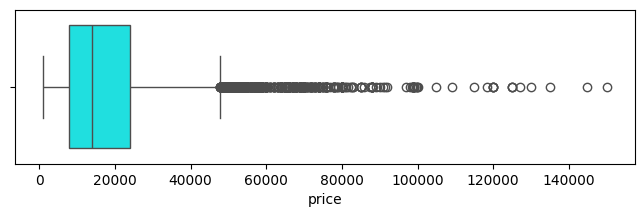

In [24]:
#box plot for price
plt.figure(figsize=(8,2))
sns.boxplot(data=df, x='price',  color='cyan')
plt.show()

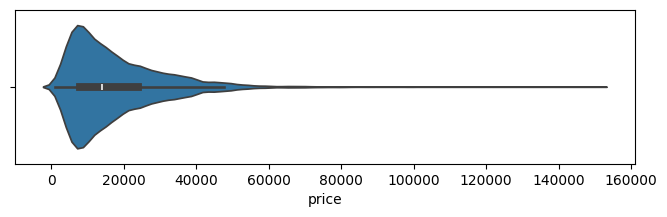

In [25]:
#violinplot for price
plt.figure(figsize=(8,2))
sns.violinplot(data=df, x='price')
plt.show()

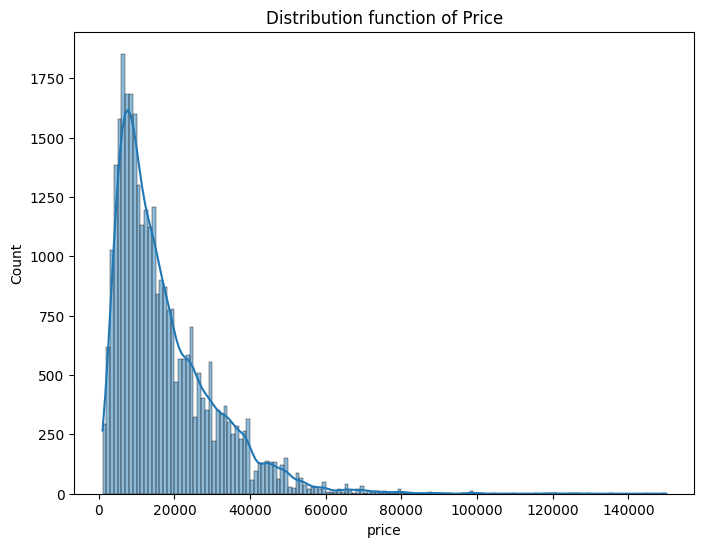

In [26]:
# histplot for price
plt.figure(figsize=(8,6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution function of Price')
plt.show()

Important finding: most of demand for used cars have price between 5000 to 25000 dollars

price can be divided into three categories,
1-low price cars : from 1000 to 10000 2-middle pirce cars: from 10000 to 50000 3-high price cars: more than 50000

In [27]:
low_price = df.query ('price > 1000 and price <= 10000')
middle_price = df.query ('price > 10000 and price <= 50000')
high_price = df.query ('price > 50000')

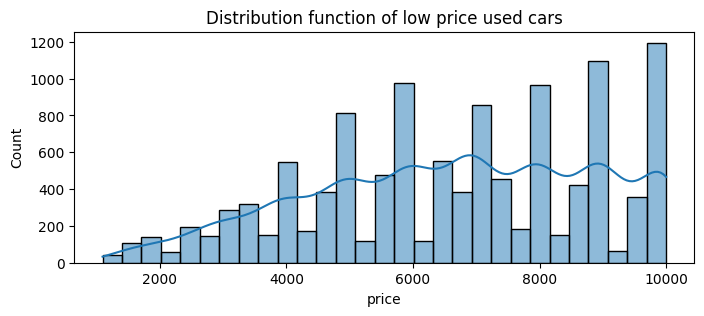

In [28]:
plt.figure (figsize = (8,3))
sns.histplot (low_price['price'], kde= True)
plt.title('Distribution function of low price used cars')
plt.show()

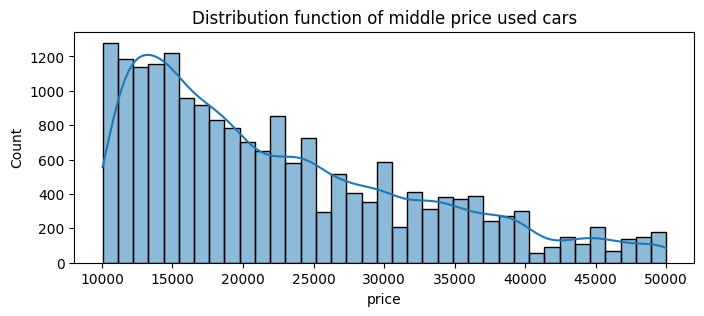

In [29]:
plt.figure (figsize = (8,3))
sns.histplot (middle_price['price'], kde= True)
plt.title('Distribution function of middle price used cars')
plt.show()

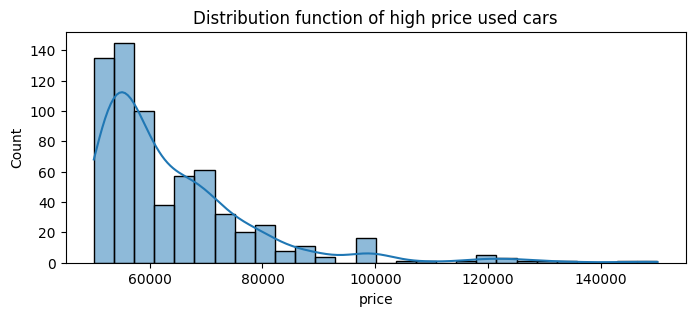

In [30]:
plt.figure (figsize = (8,3))
sns.histplot (high_price['price'], kde= True)
plt.title('Distribution function of high price used cars')
plt.show()

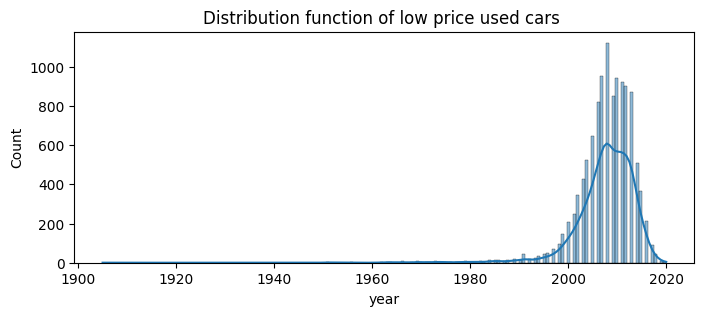

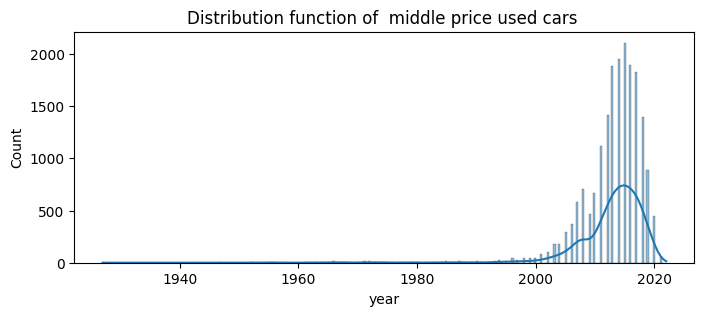

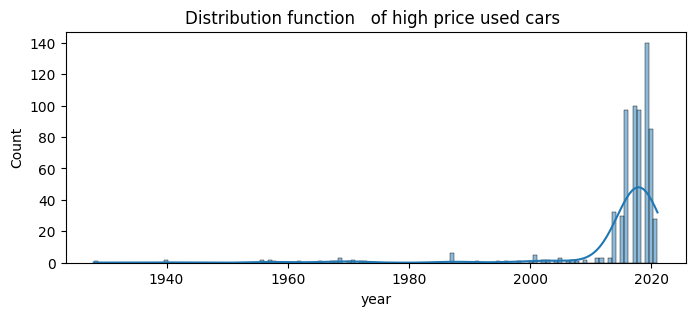

In [31]:
# we can also see distribution of price, based on the year
plt.figure (figsize = (8,3))
sns.histplot (low_price['year'], kde= True)
plt.title('Distribution function of low price used cars ')
plt.show()
plt.figure (figsize = (8,3))
sns.histplot (middle_price['year'], kde= True);
plt.title('Distribution function of  middle price used cars ')
plt.show()
plt.figure (figsize = (8,3))
sns.histplot (high_price['year'], kde= True);
plt.title('Distribution function   of high price used cars ')
plt.show()

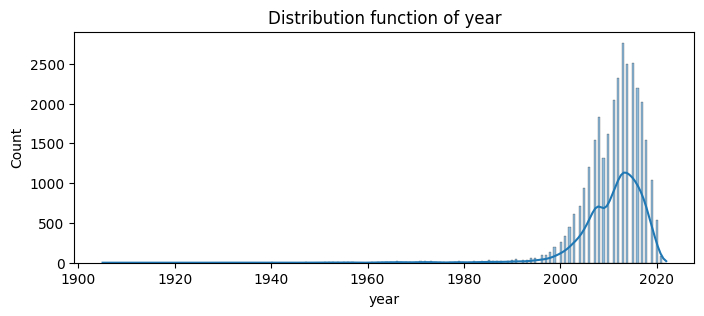

In [32]:
plt.figure (figsize = (8,3))
sns.histplot (df['year'], kde= True)
plt.title('Distribution function of year')
plt.show()

Important finding: most of demand for used cars with year >= 2008

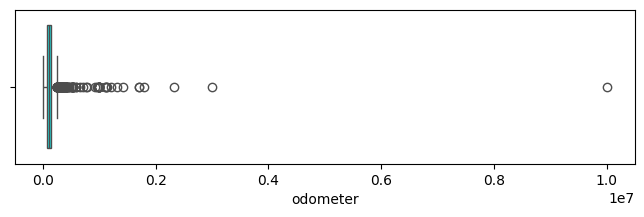

In [33]:
#box plot for odometer
plt.figure(figsize=(8,2))
sns.boxplot(data=df, x='odometer',  color='cyan')
plt.show()

In [34]:
# we see that some odometer are oulier. we can remover them with z-score or other approach, but we can make decision for simplicity odometer <=400_000
df= df [( df ['odometer'] <= 400000)]

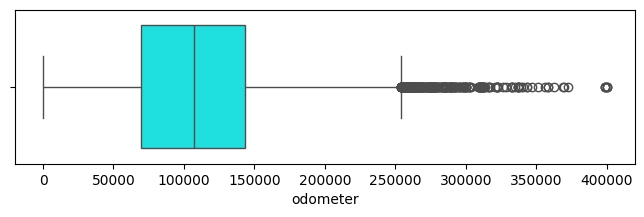

In [35]:
#box plot for odometer
plt.figure(figsize=(8,2))
sns.boxplot(data=df, x='odometer',  color='cyan')
plt.show()

Important finding: odometers between 50_000 to 150_000 have the highest demand and odometer higher than 250_000 is very low


# EDA: Visualizing relationships between features and price

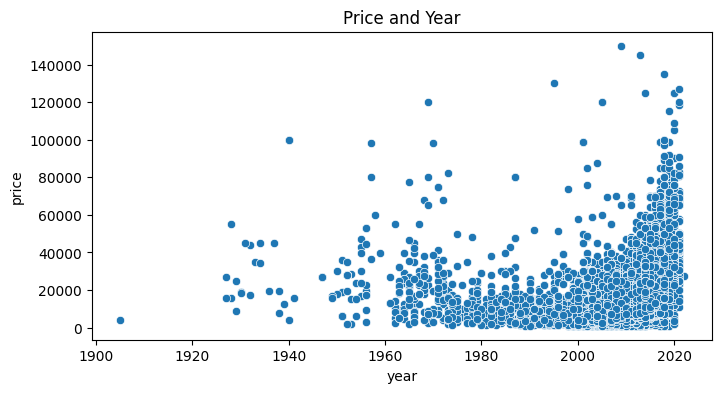

In [36]:
# price and year
plt.figure(figsize=(8,4))
sns.scatterplot(data= df , x='year', y='price')
plt.title('Price and Year')
plt.show()

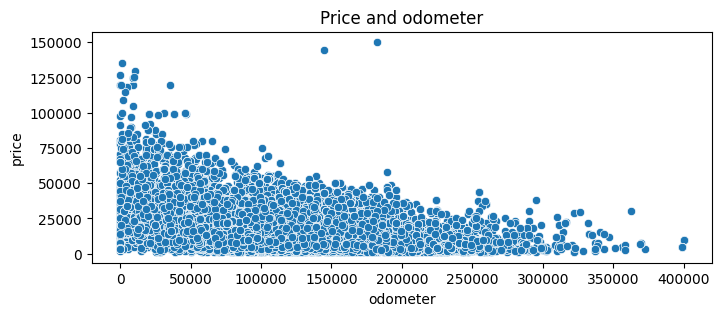

In [37]:
# price and odometer
plt.figure(figsize=(8,3))
sns.scatterplot(data= df , x='odometer', y='price')
plt.title('Price and odometer')
plt.show()

In [38]:
# check the correlation between price,year and odometer
corr_num = df[['price', 'year', 'odometer']] .corr()
print(corr_num)

             price      year  odometer
price     1.000000  0.343463 -0.445633
year      0.343463  1.000000 -0.285684
odometer -0.445633 -0.285684  1.000000


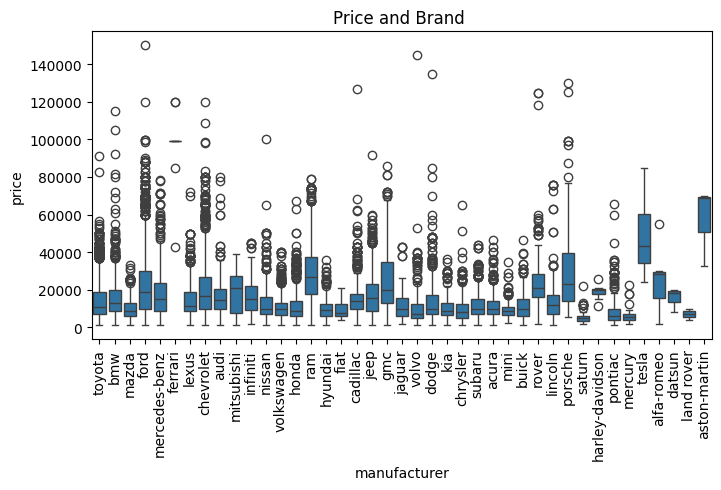

In [39]:
# Price and brand
plt.figure(figsize=(8,4))
sns.boxplot(data= df , x='manufacturer', y='price')
plt.xticks(rotation= 90)
plt.title('Price and Brand ')
plt.show()

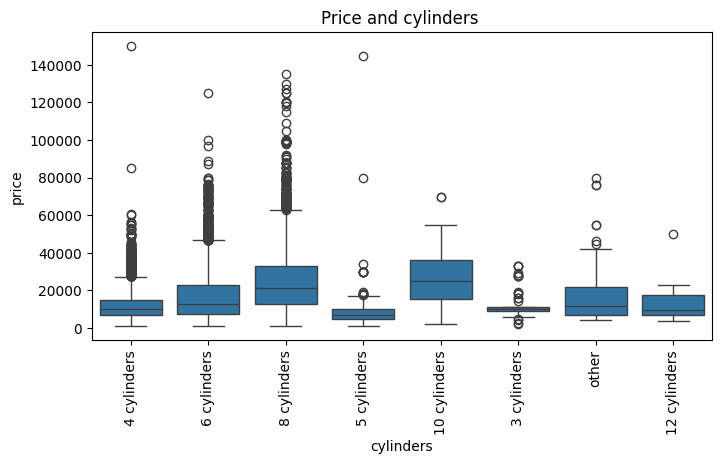

In [40]:
# Price and cylinders
plt.figure(figsize=(8,4))
sns.boxplot(data= df , x='cylinders', y='price')
plt.xticks(rotation= 90)
plt.title('Price and cylinders ')
plt.show()


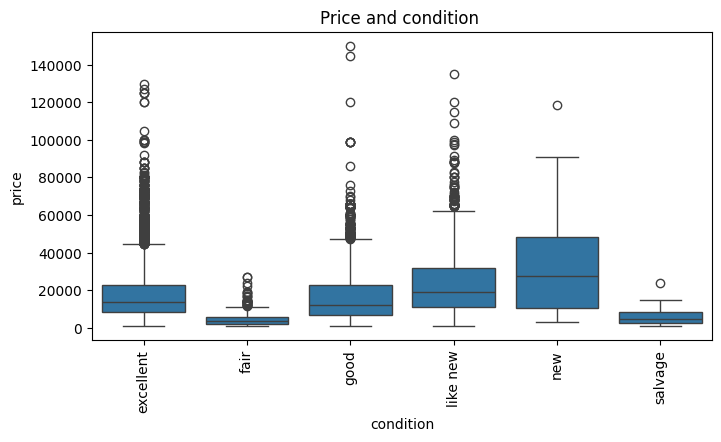

In [41]:
# Price and condition
plt.figure(figsize=(8,4))
sns.boxplot(data= df , x='condition', y='price')
plt.xticks(rotation= 90)
plt.title('Price and condition ')
plt.show()

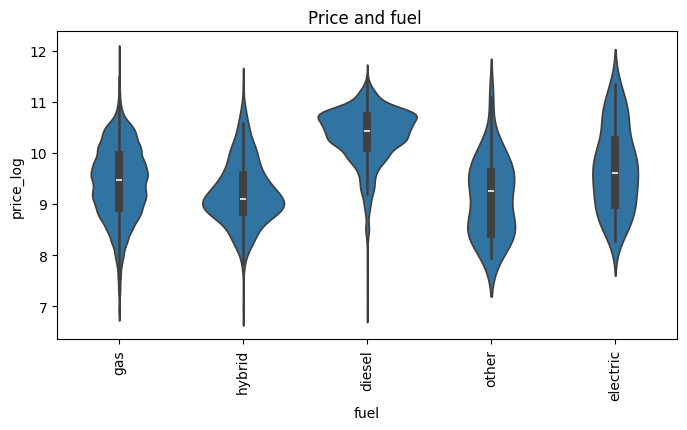

In [42]:
# Price and fuel
df['price_log'] = np.log(df['price'])
plt.figure(figsize=(8,4))
sns.violinplot (data= df , x='fuel', y='price_log')
#sns.boxplot(data= df , x='fuel', y='price_log')
plt.xticks(rotation= 90)
plt.title('Price and fuel ')
plt.show()

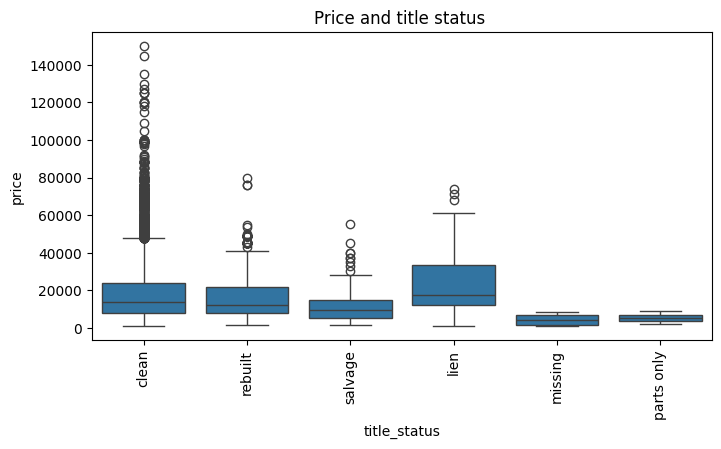

In [43]:
# Price and title status
plt.figure(figsize=(8,4))
sns.boxplot(data= df , x='title_status', y='price')
plt.xticks(rotation= 90)
plt.title('Price and title status ')
plt.show()

plot shows that lien and clean title have higher price.

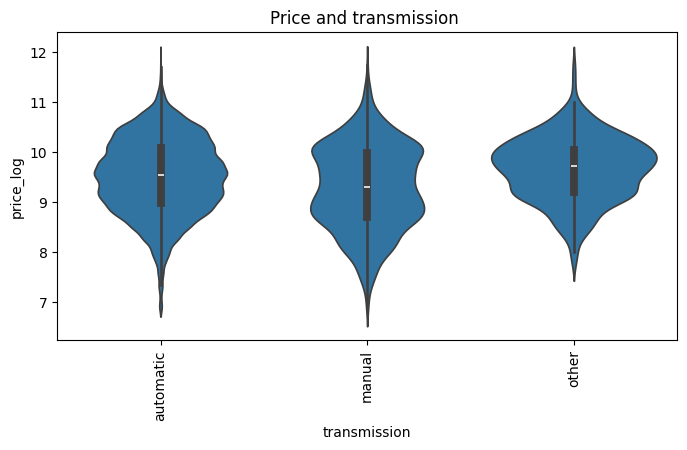

In [44]:
# Price and transmission
plt.figure(figsize=(8,4))

sns.violinplot(data= df , x='transmission', y='price_log')
plt.xticks(rotation= 90)
plt.title('Price and transmission ')
plt.show()

figure shows that average price of manual is minimum, and automatic has higher price.


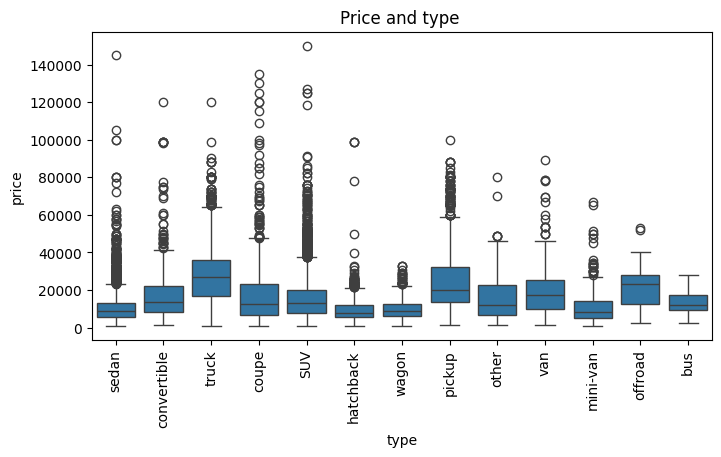

In [45]:
# Price and type
plt.figure(figsize=(8,4))
sns.boxplot(data= df , x='type', y='price')
plt.xticks(rotation= 90)
plt.title('Price and type ')
plt.show()

figure shows that sedan, hathcback, wagon and min-van have low price, while truck, offroad, and pickup have high price

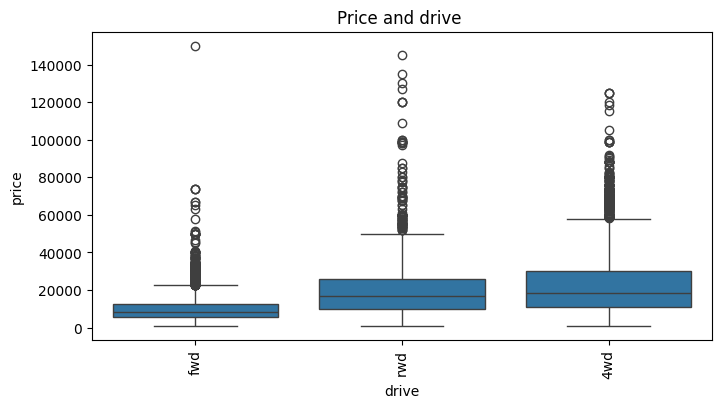

In [46]:
# Price and drive
plt.figure(figsize=(8,4))
sns.boxplot(data= df , x='drive', y='price')
plt.xticks(rotation= 90)
plt.title('Price and drive ')
plt.show()

plot shows that 4wd has higher pirce and fwd has lower price, but there is not important difference


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Simple Liner Regression

In [50]:
df.nunique()

,0
id,31582
region,390
price,3076
year,89
manufacturer,41
model,4908
condition,6
cylinders,8
fuel,5
odometer,15421


In [51]:
# Imputation for remaining columns
cat_cols = ['condition', 'cylinders', 'fuel', 'transmission', 'drive', 'type', 'paint_color', 'manufacturer','title_status']
num_cols = ['price', 'year', 'odometer']
df=df[cat_cols + num_cols ]

In [52]:
# we define age variable, instead of year and drop year variable
df['age'] = 2025 - df['year']
df.drop(columns = ['year'], inplace = True)

In [53]:
#target is price
X = df.drop(columns=['price'])
y = df['price']

# OneHot Encode the features and drop the first value to reduce multicollinearity
X = pd.get_dummies(X, dtype=float, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [54]:
# before starting the models, we define a funtion to get R2 and MSE for regression
def error_metrics(y_train, y_train_pred, y_test, y_test_pred, pipeline):

    errors = {}

    # Errors for train data
    errors["Train_MAE"] = round (mean_absolute_error(y_train, y_train_pred),2)
    errors["Train_MSE"] = round (mean_squared_error(y_train, y_train_pred), 2)
    errors["Train_RMSE"] = round (np.sqrt(errors["Train_MSE"]), 2)
    errors['Train_Score']= round (pipeline.score(X_train, y_train), 2)

    # Errors for test data
    errors["Test_MAE"] = round (mean_absolute_error(y_test, y_test_pred), 2)
    errors["Test_MSE"] = round (mean_squared_error(y_test, y_test_pred), 2)
    errors["Test_RMSE"] = round (np.sqrt(errors["Test_MSE"]), 2)
    errors['Test_Score']= round (pipeline.score(X_test, y_test), 2)

    return errors

model_evaluation = []

In [55]:
# define pipe.
#at first we define standard scalter then use linear regression

pipe_linear = Pipeline([('scaler', StandardScaler()),
                  ('poly', PolynomialFeatures(degree = 2, include_bias = False)),
                 ('linearRegression', LinearRegression())
                       ])

pipe_linear.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('linearRegression', LinearRegression())])

In [56]:
y_train_pred = pipe_linear.predict(X_train)
y_test_pred = pipe_linear.predict(X_test)

er_linear = error_metrics(y_train, y_train_pred, y_test, y_test_pred,pipe_linear)
print ('MAE, MSE, RMSE, and Score : ')
er_linear

MAE, MSE, RMSE, and Score : 


{'Train_MAE': 3084.38,
 'Train_MSE': 24750126.93,
 'Train_RMSE': np.float64(4974.95),
 'Train_Score': 0.86,
 'Test_MAE': 3516.13,
 'Test_MSE': 45013570.7,
 'Test_RMSE': np.float64(6709.22),
 'Test_Score': 0.74}

In [57]:
pipe_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree = 2, include_bias = False)),
    ('ridge', Ridge()),
])
pipe_ridge.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('ridge', Ridge())])

In [58]:
y_train_pred = pipe_ridge.predict(X_train)
y_test_pred = pipe_ridge.predict(X_test)

er_ridge = error_metrics(y_train, y_train_pred, y_test, y_test_pred,pipe_ridge)
print ('MAE, MSE, RMSE, and Score : ')
er_ridge

MAE, MSE, RMSE, and Score : 


{'Train_MAE': 3084.68,
 'Train_MSE': 24750509.98,
 'Train_RMSE': np.float64(4974.99),
 'Train_Score': 0.86,
 'Test_MAE': 3479.23,
 'Test_MSE': 39190833.5,
 'Test_RMSE': np.float64(6260.26),
 'Test_Score': 0.77}

Best Alpha: 0.46415888336127775
Mean Squared Error on Training data: 54180078.13
Mean Squared Error on Test data: 54536071.50
manufacturer_ferrari         65916.724868
manufacturer_tesla           31191.683038
manufacturer_aston-martin    22550.165225
manufacturer_datsun          15165.703126
fuel_other                   13426.070723
dtype: float64


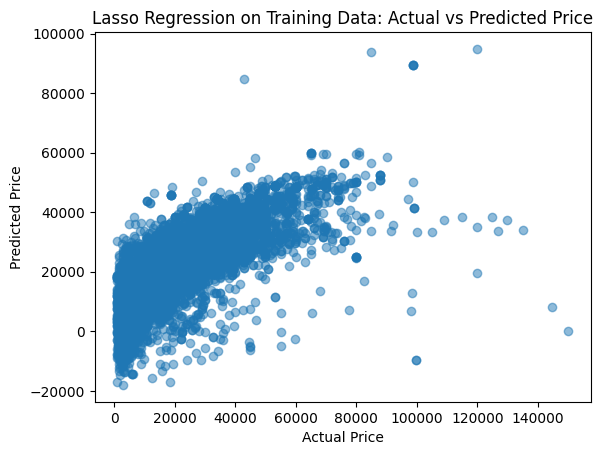

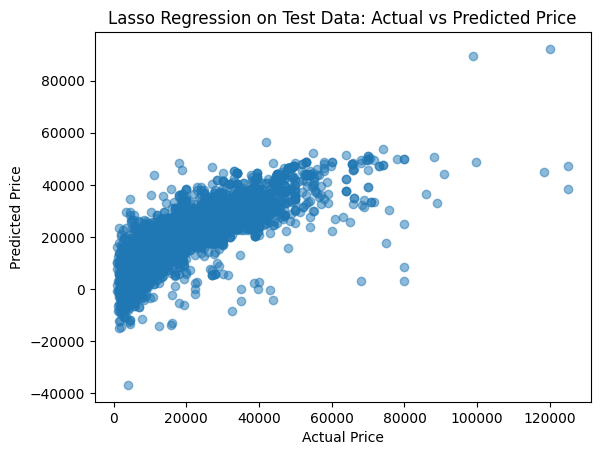

In [59]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso=Lasso()

#Tune Alpha Using GridSearchCV
alpha_values = np.logspace(-3, 3, 10)  # Try alphas from 0.001 to 1000
param_grid = {'alpha': alpha_values}

grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha: {best_alpha}")

Lasso_model = Lasso(alpha=best_alpha)  # You can tune alpha
Lasso_model.fit(X_train, y_train)

#Make predictions
y_pred_train = Lasso_model.predict(X_train)
y_pred = Lasso_model.predict(X_test)

#Evaluate model performance
mse_train = mean_squared_error(y_train, y_pred_train)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Training data: {mse_train:.2f}")
print(f"Mean Squared Error on Test data: {mse:.2f}")

lasso_coefficients = pd.Series(Lasso_model.coef_, index=X.columns)
top_5_features = lasso_coefficients.abs().nlargest(5)
print(top_5_features)

#Plot Actual vs Predicted Prices
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Lasso Regression on Training Data: Actual vs Predicted Price")
plt.show()

#Plot Actual vs Predicted Prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Lasso Regression on Test Data: Actual vs Predicted Price")
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Findings for
1) Linear Regression

Train R-squared: 0.86
Test R-squared: 0.74
This drop, along with higher MAE and RMSE on the test set, suggests that while the polynomial features help the model fit the training data very well, it might be overfitting to some of the specific patterns or noise in the training set. This means its generalization to completely new data is slightly less robust than its performance during training.



2) For Ridge Regression
Train R-squared: 0.86

Test R-squared: 0.77

Compared to the previous linear regression model (0.74 Test R-squared), the Ridge model shows a better balance between training and test performance. The gap between train and test R-squared is smaller (0.09 for Ridge vs. 0.12 for pure Linear), indicating that the Ridge regularization has effectively reduced overfitting. This means the model generalizes better to unseen data.


Lasso Regression
- identified the best_alpha as 0.4641588833627766. This indicates that the model has been tuned to find the optimal balance between fitting the training data and keeping the model simple

The "Lasso Regression on Training Data: Actual vs Predicted Price" scatter plot shows a strong linear relationship between actual and predicted prices, indicating a good fit on the training data.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

High Predictive Accuracy: Our model explains 77% of used car price variation, providing a strong understanding of market value.

Reliable Price Estimates: On average, predictions are within $3,479 of the actual price, offering a practical tool for pricing.

Age & Mileage are Key: Newer cars with lower odometer readings consistently command higher prices.

Brand Matters: Luxury brands like Audi, Mercedes-Benz, and BMW significantly boost a car's value.

Condition is Crucial: Vehicles in "new" or "excellent" condition fetch premium prices; reconditioning is a worthwhile investment.

Automatic is Preferred: Cars with automatic transmissions are generally more valuable to consumers.